<H1>  Sales Analysis<H1>

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from collections import Counter
from itertools import combinations

### Merging 12 months of Data

In [80]:
files=[file for file in os.listdir("./Sales_Data")]
all_month_data=pd.DataFrame()
for file in files:
    df=pd.read_csv("./Sales_Data/"+file)
    all_month_data=pd.concat([all_month_data,df])
all_month_data.to_csv("All_Data.csv")

### Reading updated Data

In [81]:
all_data=pd.read_csv('All_Data.csv',index_col=0)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### Clean Data

In [98]:
nan_df=all_data[all_data.isna().any(axis=1)]
nan_df.head()
all_data.dropna(inplace= True)


#### Cleaning 'Or'

In [83]:
all_data= all_data[all_data['Order Date'].str[0:2]!='Or']

#### Cleaning coloumns to correct types

In [84]:
all_data['Quantity Ordered']=pd.to_numeric(all_data['Quantity Ordered']) #To interger 
all_data['Price Each']= pd.to_numeric(all_data['Price Each']) #to float


### Augment Data

#### Month Column 

In [85]:
all_data['Month']= all_data['Order Date'].str[0:2]
all_data['Month']=all_data['Month'].astype('Int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


#### Sales Column 

In [86]:
all_data['Sales']= all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


#### City column 

In [87]:
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City']= all_data['Purchase Address'].apply(lambda x: get_city(x)+ ' '+get_state(x))
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City NY
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City NY
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City NY
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco CA
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta GA


## What was the best month for sales ? How much earned that month?

In [88]:
all_data.groupby('Month').sum()['Sales']

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

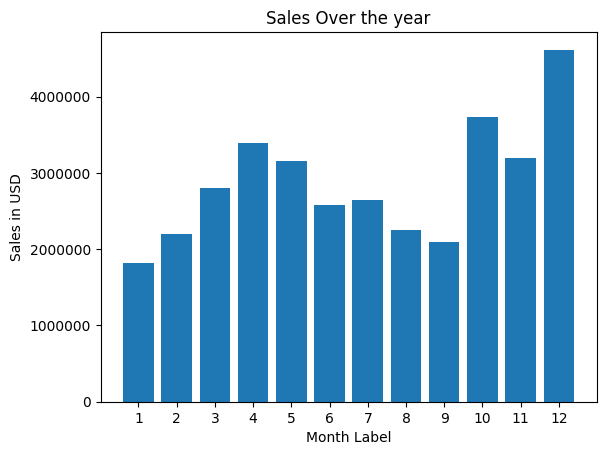

In [89]:
months=range(1,13)
result=all_data.groupby('Month').sum()
plt.bar(months,result['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD')
plt.title('Sales Over the year')
plt.ticklabel_format(style='plain')

plt.xlabel('Month Label')
plt.show()

#### December emerges as the peak sales month, driven by the tradition of gift-giving. This trend aligns seamlessly with expectations for a tech-oriented company, considering the heightened demand for tech-related gifts during this festive season.

## What city had the highest number of sales? 

In [90]:
all_data.groupby('City').sum()['Sales']

City
Atlanta GA          2795498.58
Austin TX           1819581.75
Boston MA           3661642.01
Dallas TX           2767975.40
Los Angeles CA      5452570.80
New York City NY    4664317.43
Portland ME          449758.27
Portland OR         1870732.34
San Francisco CA    8262203.91
Seattle WA          2747755.48
Name: Sales, dtype: float64

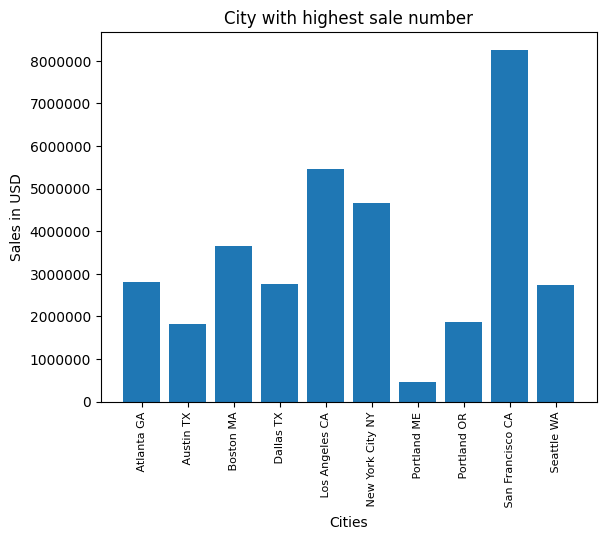

In [91]:
result=all_data.groupby('City').sum()
cities=[city for city, df in all_data.groupby('City')]
plt.bar(cities,result['Sales'])
plt.xticks(cities,rotation='vertical',size=8)
plt.title('City with highest sale number')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Cities')
plt.ylabel('Sales in USD')
plt.show()

#### The city with the most revenue brough in is San Francisco, CA this is because it has more population from the other cities plus San francisco is also a tech city whicha also play apart of this 

## What time should we disply advertisments to maximize likelihood of Customers buying our product?

In [92]:
all_data['Order Date']= pd.to_datetime(all_data['Order Date'])

/var/folders/pv/1l8x2xsd68l7j73dl_mvv47m0000gp/T/ipykernel_7366/1979206396.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date']= pd.to_datetime(all_data['Order Date'])


In [93]:
all_data['Hour']= all_data['Order Date'].dt.hour
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City NY,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City NY,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City NY,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco CA,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta GA,12


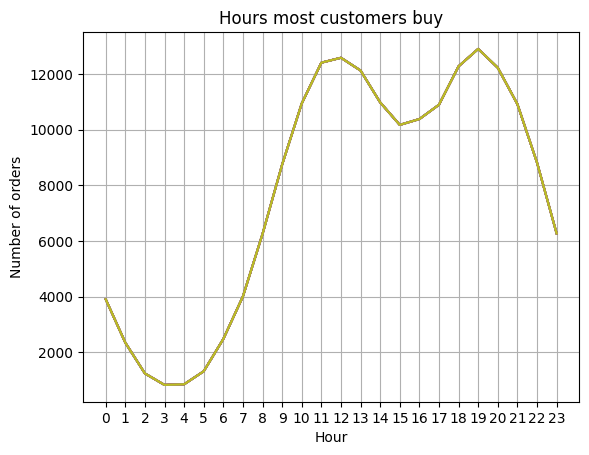

In [94]:
hours=[hour for hour,df in all_data.groupby('Hour')]
plt.plot(hours,all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of orders')
plt.title('Hours most customers buy')
plt.grid()
plt.show()

#### The best time to adverstise is at 10 Am and then from 1pm to 6Pm just before the peak times so it will influence their decision to buy more stuff 

## What products are most often sold together ?

In [95]:
df=all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped']= df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
df=df[['Order ID','Grouped']].drop_duplicates()
df.head()

/var/folders/pv/1l8x2xsd68l7j73dl_mvv47m0000gp/T/ipykernel_7366/225693978.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped']= df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"


In [96]:
count= Counter()
for row in df['Grouped']:
    row_list=row.split(',')
    for length in range(2,4):
        count.update(Counter(combinations(row_list,length)))
for key,value in count.most_common(15):
    print(key,':',value)

('iPhone', 'Lightning Charging Cable') : 1005
('Google Phone', 'USB-C Charging Cable') : 987
('iPhone', 'Wired Headphones') : 447
('Google Phone', 'Wired Headphones') : 414
('Vareebadd Phone', 'USB-C Charging Cable') : 361
('iPhone', 'Apple Airpods Headphones') : 360
('Google Phone', 'Bose SoundSport Headphones') : 220
('USB-C Charging Cable', 'Wired Headphones') : 160
('Vareebadd Phone', 'Wired Headphones') : 143
('Lightning Charging Cable', 'Wired Headphones') : 92
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') : 87
('Lightning Charging Cable', 'Apple Airpods Headphones') : 81
('Vareebadd Phone', 'Bose SoundSport Headphones') : 80
('USB-C Charging Cable', 'Bose SoundSport Headphones') : 77
('Apple Airpods Headphones', 'Wired Headphones') : 69


##### Given the insight that customers are commonly buying a phone and either a charger or headphones, implementing a "Starter Package" discount is a strategic move. You can structure this discount to encourage the purchase of a phone along with either a charger or headphones.

## #5: What product sold the most?

In [171]:
product_group = all_data.groupby('Product')['Quantity Ordered'].sum().reset_index()
print(product_group)

                       Product  Quantity Ordered
0                 20in Monitor              4129
1       27in 4K Gaming Monitor              6244
2             27in FHD Monitor              7550
3       34in Ultrawide Monitor              6199
4        AA Batteries (4-pack)             27635
5       AAA Batteries (4-pack)             31017
6     Apple Airpods Headphones             15661
7   Bose SoundSport Headphones             13457
8                Flatscreen TV              4819
9                 Google Phone              5532
10                    LG Dryer               646
11          LG Washing Machine               666
12    Lightning Charging Cable             23217
13          Macbook Pro Laptop              4728
14             ThinkPad Laptop              4130
15        USB-C Charging Cable             23975
16             Vareebadd Phone              2068
17            Wired Headphones             20557
18                      iPhone              6849


In [156]:
prices=all_data.groupby('Product').agg({'Price Each':'mean'})
print(prices)

                            Price Each
Product                               
20in Monitor                    109.99
27in 4K Gaming Monitor          389.99
27in FHD Monitor                149.99
34in Ultrawide Monitor          379.99
AA Batteries (4-pack)             3.84
AAA Batteries (4-pack)            2.99
Apple Airpods Headphones        150.00
Bose SoundSport Headphones       99.99
Flatscreen TV                   300.00
Google Phone                    600.00
LG Dryer                        600.00
LG Washing Machine              600.00
Lightning Charging Cable         14.95
Macbook Pro Laptop             1700.00
ThinkPad Laptop                 999.99
USB-C Charging Cable             11.95
Vareebadd Phone                 400.00
Wired Headphones                 11.99
iPhone                          700.00


/var/folders/pv/1l8x2xsd68l7j73dl_mvv47m0000gp/T/ipykernel_7366/1029661543.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(product_group['Product'],rotation='vertical',size=8)


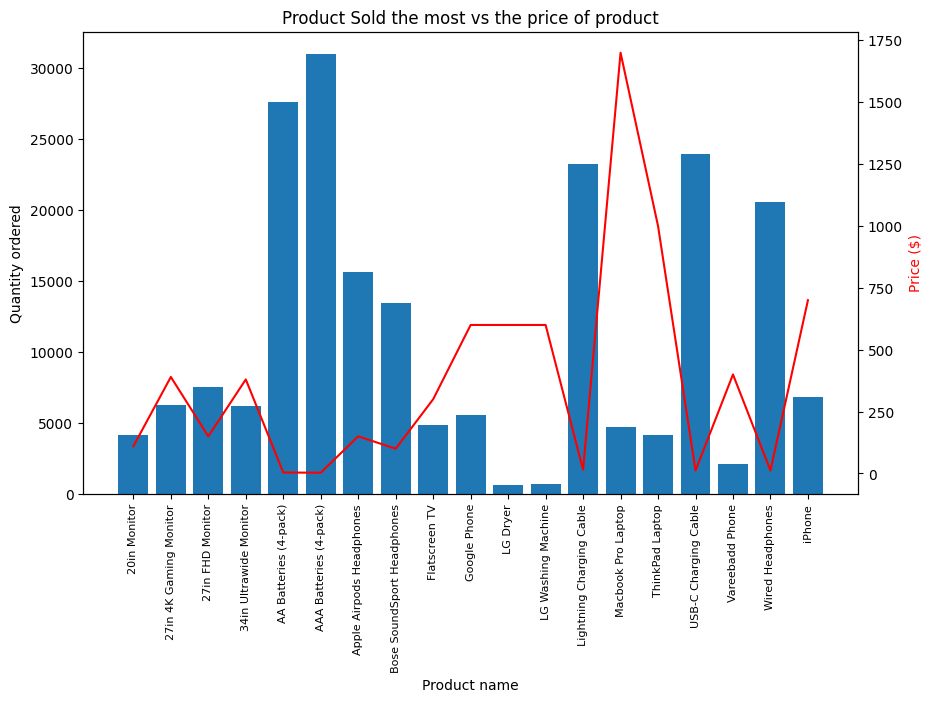

In [173]:
fig,ax1=plt.subplots(figsize=(10,6))
ax2=ax1.twinx()
ax1.bar(product_group['Product'], product_group['Quantity Ordered'])
ax2.plot(product_group['Product'],prices,color='red')
ax1.set_xticklabels(product_group['Product'],rotation='vertical',size=8)
ax1.set_xlabel('Product name')
ax1.set_ylabel('Quantity ordered')
ax2.set_ylabel('Price ($)',color='red')
ax1.set_title('Product Sold the most vs the price of product')
plt.show()

##### We can see the product sold the most are the Batteries from the graph we can conclude that the lower the price of the product the more of it is Sold in the store 